In [1]:
import numpy as np
import matplotlib.pyplot as plt

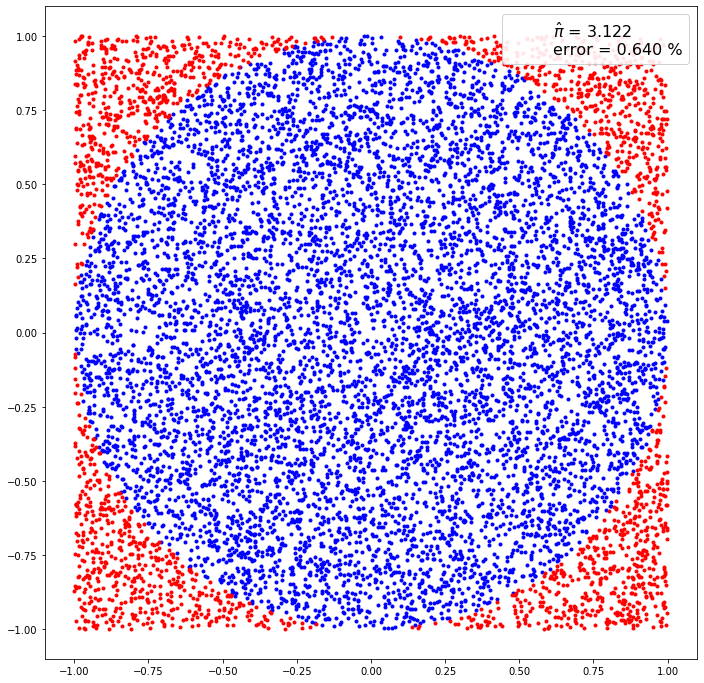

In [4]:
N = 10000

x, y = np.random.uniform(-1,1, size=(2,N))
inside = (x**2 + y**2) <= 1
pi = (inside.sum() * 4 )/N
error = abs((pi-np.pi)/ pi) * 100

outsde = np.invert(inside)
plt.figure(figsize=(12,12))
plt.plot(x[inside], y[inside], 'b.')
plt.plot(x[outsde], y[outsde], 'r.')
plt.plot(0,0, label='$\hat \pi $ = {:4.3f} \nerror = {:4.3f} %'.format(pi, error), alpha = 0)
plt.axis('square')
plt.legend(frameon=True, framealpha=0.9, fontsize=16)

In [12]:
# simple implementation of metopolis algorithm

def metropolis(func, steps = 10000):
    """ A very smiple metropolis implementation"""
    
    samples = np.zeros(steps)
    old_x = func.mean()
    old_prob = func.pdf(old_x)
    
    for i in range(steps):
        new_x = old_x + np.random.normal(0, 0.5)
        new_prob = func.pdf(new_x)
        acceptance = new_prob / old_prob
        
        if acceptance >= np.random.random():
            samples[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            samples[i] = old_x
    return samples

In [7]:
from scipy import stats

/home/ranjan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


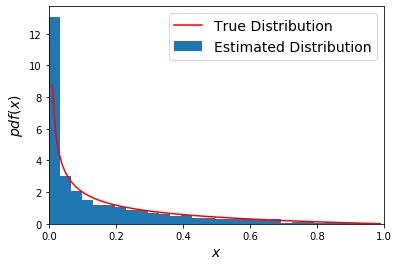

In [14]:
func = stats.beta(0.4, 2)
samples = metropolis(func=func)

x = np.linspace(0.01, 0.99, 100)
y = func.pdf(x)

plt.xlim(0,1)
plt.plot(x, y, 'r-', label = 'True Distribution')
plt.hist(samples, bins=30, normed=True, label='Estimated Distribution')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)